# Progress Update Report - Group 47

### Lingtian He, Zhenhao Chen, Tong Cheng

## Overall Project Objectives

The project is focused on the analysis of **CS:GO**(Counter Strike: Global Offensive), a popular first-person-shooting online video game. 

Since each player could utilize multiple weapons and grenades, choose the route to move on, stay in the site to fire or hide, and make different decisions, we would like to analyze the data by: comparising the professional players and common players to see the different decisions they make under similar situation; computing the winning probability under each possible condition; finding the factors affecting the winning probability.

Overall, we would like to provide the useful strategies under different conditions, such as the buying strategies at the beginning of each round, timing and positioning strategies and bombing planting strategies.


## Description of Data

The whole dataset contains the overall and detailed information of 14921 ESEA matches, and the data of map. 
The dataset of match is initially separated by 2 parts, and each part has the independent files of basic information data, damage data, grenade data and kill data. 

- [1] **Metadata** file: ‘esea_meta_demos’ contains per round meta information. 
- [2] **Damage** file: ‘Esea_master_dmg_demos’, each row documents of which an event when a player is hurt by another player. 
- [3] **Grenade** file: ‘esea_master_grenades_demos’ contains a grenade thrown entry no matter whether the grenade causes damage.
- [4] **Kill** file: ‘esea_master_kills_demos’, each row of which is a kill entry. 
- [5] **Map** file:  ‘map_data.csv’ also includes 7 official radar maps, which specifies in-game coordinates to aid in mapping data over them. 

The dataset is obtained from Kaggle Dataset ‘CS:GO Competitive Matchmaking Data’. It can be found [here](https://www.kaggle.com/skihikingkevin/csgo-matchmaking-damage).

## Direction of Analysis

The analysis mainly focus on the map 'dust II' (filename de_dust2), a classical and popular map in csgo. 
The analysis will be mainly emphasized on the following parts:
- Compare professional players and common players in: the weapon preference, grenade preference, strategies on special locations and arrival time, attacking position and hit box.
- Analyze the winning probability under each round condition, conditions that include the round type(ECO, normal, etc), scores, team-wealth and equipment, bombing or not, number of survivors;
- Identify the factors that affect the winning probability: bomb planting situation, timing and positioning strategy( arriving which position at what time), equipment, number of survivors, etc.

Based on the previous parts, we would like to come up with the practical strategies under different conditions:

- Buying strategies at the beginning of each round, considering the round type, scores, and team-wealth;
- Timing and positioning strategies
- Bombing planting strategies

## Progress Summary

Until now, we have completed the preprocessing stage listed above, and are still working on the analysis part.

**Preprocessing:**

In the preprocess stage, we have selected, filtered, cleaned, aggregated and converted the dataset, in detail:
1. merge the specific data (damage, kill, grenade) with basic data (metadata), because we have 7 independent dataset and we have to join them together for further analysis. 
2. concatenate these 2 parts for each merged dataset(dmg, kill, grenade), since the data of matches has been separated into 2 parts.
3. drop several useless columns: the map that the match was played on, the current tick in the demo the entry took place, the steam id of the attacker and the victim, the new rank of the attacking player and victim after the match is complete.
4. create 3 new columns('seconds', 'wp_side', 'pro_game') for dmg dataset and 1 new column('seconds') for grenade dataset
   - 'seconds' indicates the time in seconds at which the damage or grenade happens in each round
   - 'wp_side' indicates whether the weapon is only available for ct(counterterrorist) or for t(terrorist)
   - 'pro_game' indicates whether it is a pro game
5. represent the numeric data in a reasonable way. Some values in the column 'ct_alive' and 't_alive', the columns showing the total number of survivors for either CT(Counter Terrorist) or T(Terrorist), are negative. Negativity actually means the total number of the dead. We convert the negative number to positive number by adding 5 to the negative value, because the total number of player in either CT or T is 5.
6. fill the missing value. Since CT can not plant the bomb in every round, the site where the bomb is planted will not be recorded for this round. So we replace the Nan value with 'Not Plant'.

**Analysis:**
1. we have compared the professional player and common player in the weapon preference. Separate the dataset into professional player and commpn player, we made the subplots for clear comparison. And we analyzed the weapon preference on the following 3 parts by histogram.
    - on the general type(Rifle, Pistol, Sniper, Heavy, SMG, Grenade, Equipment)
    - on the detailed type
    - on the detailed type by general category
2. we have compared the professional player and common player in hitbox, since pro players are expected to perform better than common players and hitbox could be a good measurement. For analysis, we use counterplot. However, the result is not what we expected, which actually shows that most damage is made on chest for common players while ‘generic’ is the biggest part for pro players. We think it might be an issue with grenade damage, so we eliminate grenade damage for pro players. However, things don’t change much, so we eliminate weapon ‘Unknown’. And then the performance looks similar for common players and pro players.
3. we have worked out the winning probability affected by the site where bomb is planted, considering both CT side and T side. 
4. we have made heatmaps using seaborn kdeplot for revealing both sides' strategy and providing recommendations, especially focusing on attacking position under different scenarios:
    - Attacking position
    - Attacking position during pistol round
    - Attacking position for sniper
    - Grenade landing position
    - Attacking position under counter-terrorists eco-advantage round
    - Attacking position under terrorists eco-advantage round

## Progress Demonstration (in code)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

 > ### Preprocessing data

1.We input the data downloaded from Kaggle, and choose the map dust2.

In [2]:
path='/Users/andychen/Desktop/UMD/Spring 2019/Data Processing and Analysis in Python （BUDT758X)/Project/Data/csgo-matchmaking-damage/'

In [3]:
meta_1=pd.read_csv(path+'esea_meta_demos.part1.csv')
meta_1=meta_1[meta_1.map=='de_dust2'] 
meta_2=pd.read_csv(path+'esea_meta_demos.part2.csv')
meta_2=meta_2[meta_2.map=='de_dust2']

kill_1=pd.read_csv(path+'esea_master_kills_demos.part1.csv')
kill_2=pd.read_csv(path+'esea_master_kills_demos.part2.csv')
dmg_1=pd.read_csv(path+'esea_master_dmg_demos.part1.csv')
dmg_2=pd.read_csv(path+'esea_master_dmg_demos.part2.csv')
grenade_1=pd.read_csv(path+'esea_master_grenades_demos.part1.csv')
grenade_2=pd.read_csv(path+'esea_master_grenades_demos.part2.csv')

2.The basic information as mentioned is in the file called 'esea_meta_demos'. In order to connect other data(damage, grenade and kill) with basic information of every match, we inner join the data on column 'file' and 'round'.
Since the whole dataset, all the matches, has been separated into part1 and part2, we have to combine them together.

In [4]:
#inner join the kill data with meta data
kill_1=meta_1.merge(kill_1, how='inner', on=['file','round'])
kill_2=meta_2.merge(kill_2, how='inner', on=['file','round'])
kill=pd.concat([kill_1, kill_2]) #concatenate part1 and part2
kill.drop(['map','tick'], axis=1, inplace=True) #drop the useless column

#inner join the damage data with meta data
dmg_1=meta_1.merge(dmg_1,how='inner',on=['file','round'])
dmg_2=meta_2.merge(dmg_2,how='inner',on=['file','round'])
dmg=pd.concat([dmg_1,dmg_2]) #concatenate part1 and part2
dmg.drop(['map','tick','att_id','att_rank','vic_id','vic_rank'],axis=1,inplace=True) #drop the useless column

#inner join the grenade data with meta data
grenade_1=meta_1.merge(grenade_1,how='inner',on=['file','round'])
grenade_2=meta_2.merge(grenade_2,how='inner',on=['file','round'])
grenade=pd.concat([grenade_1,grenade_2]) #concatenate part1 and part2
grenade.drop(['map','att_id','att_rank','vic_id','vic_rank'],axis=1,inplace=True) #drop the useless column

3.We also generate some other useful data from original dataset: 
   - [seconds] indicates the time in seconds at which the damage or grenade happens in each round in the dmg data and grenade data
   - [wp_side] indicates whether the weapon is only available for ct(Counter Terrorist) or for t(Terrorist) in the dmg data
   - [pro_game] indicates whether it is a pro game in the dmg data

In [5]:
#add a column called 'seconds' in each round from start time and end time 
dmg.seconds=dmg.seconds-dmg.start_seconds
grenade.seconds=grenade.seconds-grenade.start_seconds

In [6]:
#add a column called 'wp_side', which indicates whether it's a CT weapon or T weapon
keys=[i for i in dmg.wp.unique()]
ct_wp=['USP','P2000','FiveSeven','MP9','Famas','M4A4','M4A1','AUG','Scar20','Incendiary']
t_wp=['Glock','Tec9','Mac10','Gallil','AK47','SG556','G3SG1','SawedOff','Molotov']
values=['ct' if i in ct_wp else 't' if i in t_wp else 'both' for i in keys]
wp_map=dict(zip(keys,values))
dmg['wp_side']=dmg.wp.map(wp_map)

In [7]:
#add column 'pro_game' indicates if it's a pro game
dmg['pro_game']=dmg.att_team.apply(lambda x: 0 if x=='Team 1' or x=='Team 2' else 1)

4.Some values in columns are represented in different ways, so we unify them in one way for further use.

In [8]:
#convert negative number to postive, negative number meaning that how many people die
kill['ct_alive'][kill['ct_alive']<0]=kill['ct_alive'][kill['ct_alive']<0].apply(lambda x: x+5)
kill['t_alive'][kill['t_alive']<0]=kill['t_alive'][kill['t_alive']<0].apply(lambda x: x+5)

5.Set a value for missing data. Since CT can not plant the bomb in every round, the site where the bomb is planted will not be recorded for this round. So we replace the Nan value with 'Not Plant'.

In [9]:
dmg.bomb_site = dmg.bomb_site.fillna('Not Plant')

> ### Analysis of the preprocessed data

### _The weapon preference of professonal players and common players_

In [10]:
#separate into two dfs: pro or not pro
dmg_common=dmg[dmg['pro_game']==0]
dmg_pro=dmg[dmg['pro_game']==1]

**1. weapon preference on general type**

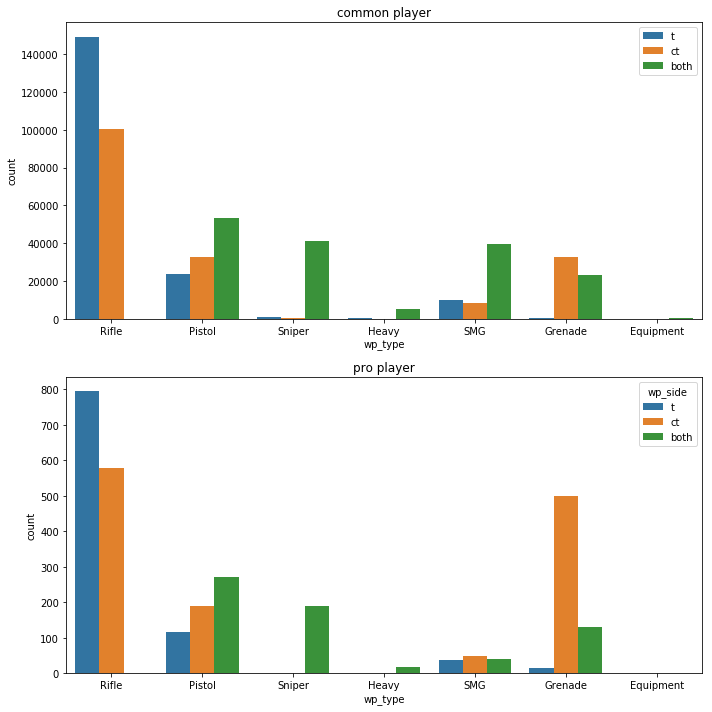

In [11]:
#future development:see https://matplotlib.org/gallery/pie_and_polar_charts/polar_bar.html#sphx-glr-gallery-pie-and-polar-charts-polar-bar-py
f,a=plt.subplots(2,1,figsize=(10,10))
sns.countplot(x='wp_type', data=dmg_common,ax=a[0],order=['Rifle','Pistol','Sniper','Heavy','SMG','Grenade','Equipment'],hue='wp_side',hue_order=['t','ct','both']).set_title('common player')
a[0].legend(loc='upper right')
sns.countplot(x='wp_type', data=dmg_pro,ax=a[1],order=['Rifle','Pistol','Sniper','Heavy','SMG','Grenade','Equipment'],hue='wp_side',hue_order=['t','ct','both']).set_title('pro player')
plt.tight_layout()

***Summary of the weapon preference of professonal players and common players on general type:***

- Pro players use grenade more often than common players. 
- Both common players and pro players have very similar preferences towards other weapon types.
- Rifle is the most popular type of weapon.

**2. weapon preference on detailed type**

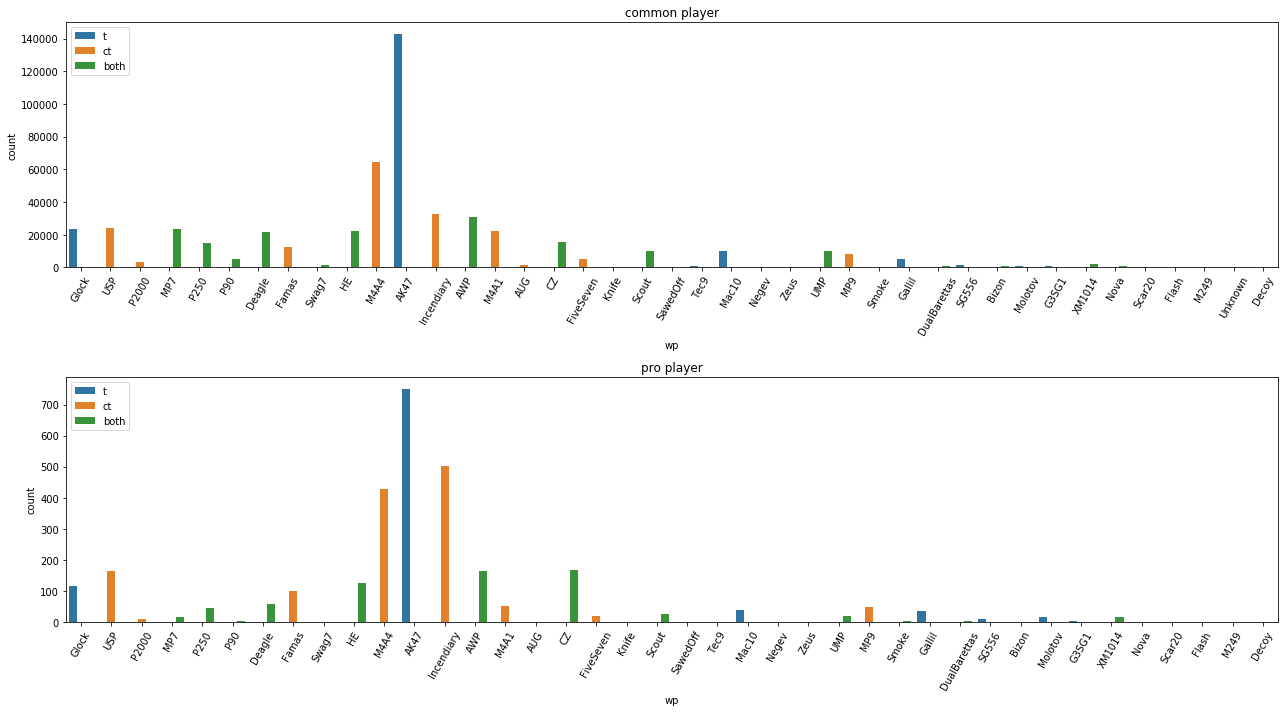

In [12]:
#weapon preference(detailed)
f,a=plt.subplots(2,1,figsize=(18,10))
g=sns.countplot(x='wp', data=dmg_common,ax=a[0],order=list(dmg_common.wp.unique()),hue='wp_side',hue_order=['t','ct','both'])
g.set_title('common player')
g.set_xticklabels(g.get_xticklabels(),rotation=60)
a[0].legend(loc='upper left')

#remove Unknown type for current use
col_use=list(dmg_common.wp.unique())
col_use.pop(col_use.index('Unknown'))
g=sns.countplot(x='wp', data=dmg_pro,ax=a[1],order=col_use,hue='wp_side',hue_order=['t','ct','both'])
g.set_title('pro player')
g.set_xticklabels(g.get_xticklabels(),rotation=60)
a[1].legend(loc='upper left')
plt.tight_layout()

***Summary of the weapon preference of professonal players and common players on detailed type:***

- Both common players and pro players would like to use AK47 and M4A4 frequently.
- But pro player would also equip incendiary more often than M4A4, since incendiary is a more strategic weapon.

**3. weapon preference on detailed type in each category without considering pro player and com player**

As we have analyzed the weapon preference on an overview of category and on the detailed weapon chosen, we would like to see the detailed weapon choosen in each category.

In [13]:
#weapon preference by category and detail type
wp_hier=dmg.set_index(['wp_type','wp'])
wp_hier_count=wp_hier.pivot_table(values=['round'],index=['wp_type','wp'],aggfunc='count')

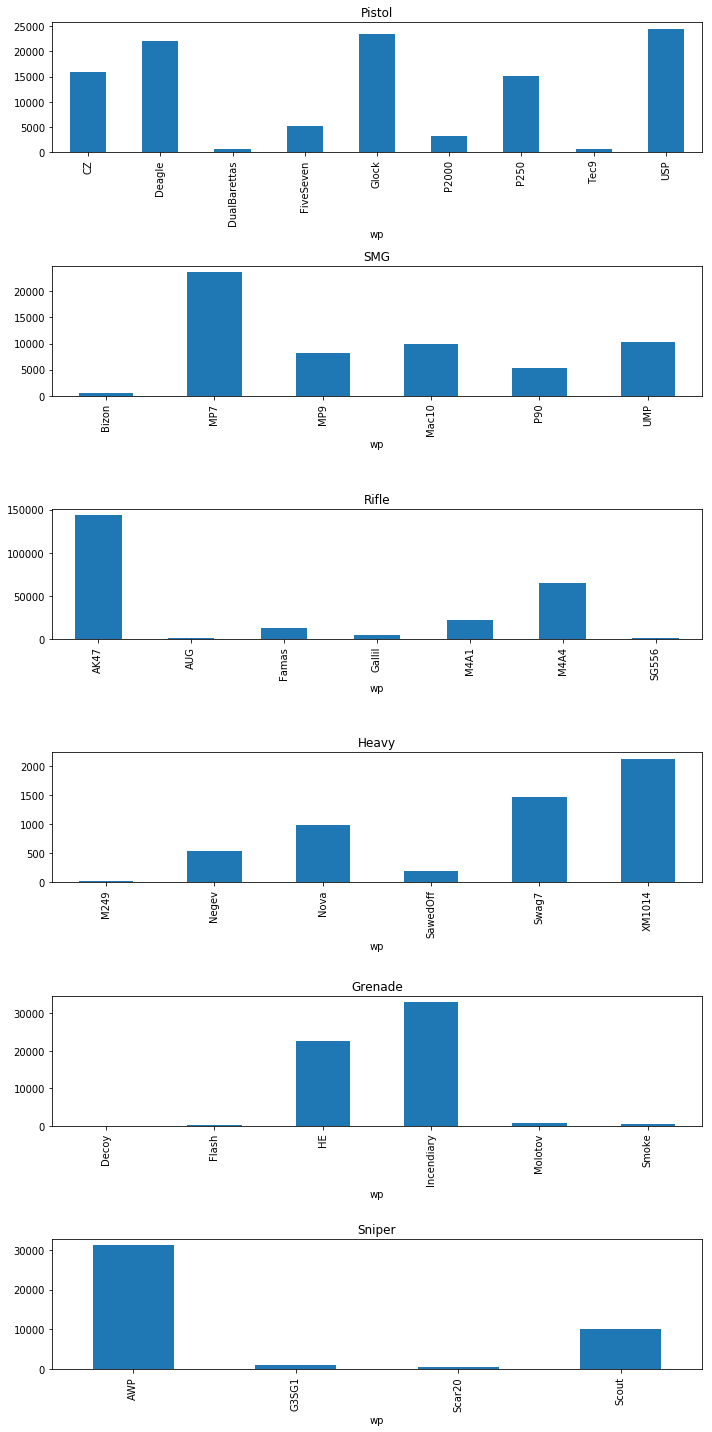

In [14]:
#preference by weapon category
f,a=plt.subplots(6,1,figsize=(10,20))
wp_hier_count.xs('Pistol').plot(kind='bar',ax=a[0],title='Pistol',legend=False)
wp_hier_count.xs('SMG').plot(kind='bar',ax=a[1],title='SMG',legend=False)
wp_hier_count.xs('Rifle').plot(kind='bar',ax=a[2],title='Rifle',legend=False)
wp_hier_count.xs('Heavy').plot(kind='bar',ax=a[3],title='Heavy',legend=False)
wp_hier_count.xs('Grenade').plot(kind='bar',ax=a[4],title='Grenade',legend=False)
wp_hier_count.xs('Sniper').plot(kind='bar',ax=a[5],title='Sniper',legend=False)
plt.tight_layout()

***Summary of the weapon preference of professonal players and common players on detailed type in each category:***

- For Pistol category, deagle, glock and USP is more popular, but DualBarettas and Tec9 are barely used.
- For SMG category, players preder to use MP7, but rarely choose Bizon.
- For Rifle category, AK47 is the most popular one, but AUG, SG556 and Gallil are almost never choosen.
- For Heavy category, XM1014 is more likely to be used, but M249 is least likely.
- For Grenade category, increndiary is relatively much popular.
- For Sniper category, players would like to choose AWP, insteady of G35G1 and scar20.

In depth, the higher popularity of these listed weapon maybe because of the ease of collimation, the large damage produced, the large amount of bullet equiped, cost-effective price, etc.

### _The hitbox comparison of professional players and common players_

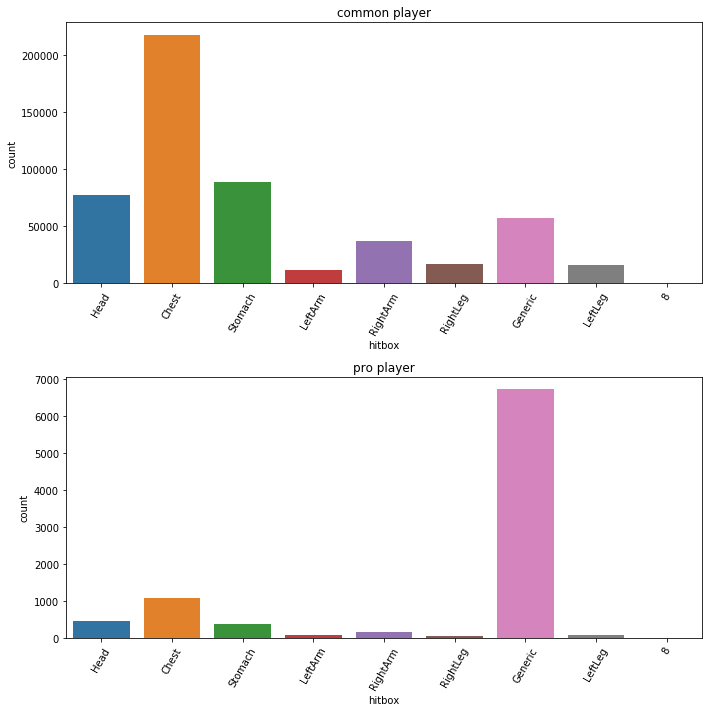

In [15]:
#hitbox analysis
f,a=plt.subplots(2,1,figsize=(10,10))
g=sns.countplot(x='hitbox', data=dmg_common,ax=a[0],order=list(dmg.hitbox.unique()))
g.set_title('common player')
g.set_xticklabels(g.get_xticklabels(),rotation=60)

g=sns.countplot(x='hitbox', data=dmg_pro,ax=a[1],order=list(dmg.hitbox.unique()))
g.set_title('pro player')
g.set_xticklabels(g.get_xticklabels(),rotation=60)
plt.tight_layout()

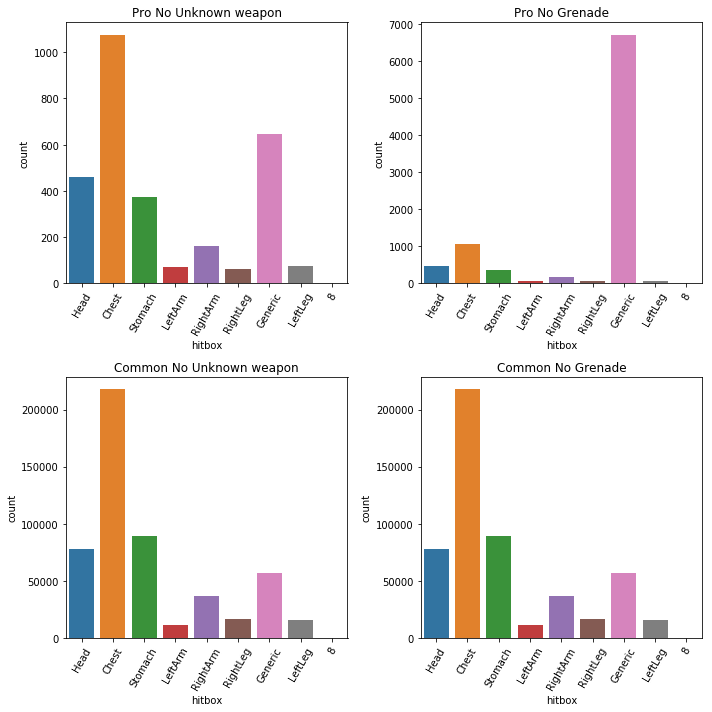

In [16]:
#exclude certain factors
f,a=plt.subplots(2,2,figsize=(10,10))
g=sns.countplot(x='hitbox', data=dmg_pro[dmg_pro['wp']!='Unknown'],ax=a[0,0],order=list(dmg.hitbox.unique()))
g.set_title('Pro No Unknown weapon')
g.set_xticklabels(g.get_xticklabels(),rotation=60)

g=sns.countplot(x='hitbox', data=dmg_pro[dmg_pro['wp']!='Grenade'],ax=a[0,1],order=list(dmg.hitbox.unique()))
g.set_title('Pro No Grenade')
g.set_xticklabels(g.get_xticklabels(),rotation=60)
plt.tight_layout()

g=sns.countplot(x='hitbox', data=dmg_common[dmg_common['wp']!='Unknown'],ax=a[1,0],order=list(dmg.hitbox.unique()))
g.set_title('Common No Unknown weapon')
g.set_xticklabels(g.get_xticklabels(),rotation=60)

g=sns.countplot(x='hitbox', data=dmg_common[dmg_common['wp']!='Grenade'],ax=a[1,1],order=list(dmg.hitbox.unique()))
g.set_title('Common No Grenade')
g.set_xticklabels(g.get_xticklabels(),rotation=60)
plt.tight_layout()

***Summary of the hitbox comparison of professional players and common players:***

- For common players, most of the time, they hit chest.
- For pro player, most of the time they hit generic. This is not expected. Generic the biggest part for pro player, even if grenade damage is excluded.

### _The winning probability affected by the site where bomb is planted, considering both CT side and T side_

In [17]:
#winning rate by bomb_site
dmg['map']='dust2'
bomb_win = dmg.groupby(['file', 'round', 'bomb_site', 'winner_side','map'])['start_seconds'].first().groupby(['map','bomb_site', 'winner_side']).count()
bomb_win_pct = bomb_win.groupby(level=[0,1]).apply(lambda x: 100 * x / float(x.sum()))
bomb_win_pct.unstack('map')

map                             dust2
bomb_site winner_side                
A         CounterTerrorist  20.836286
          Terrorist         79.163714
B         CounterTerrorist  19.679962
          Terrorist         80.320038
Not Plant CounterTerrorist  46.212121
          Terrorist         53.787879

***Summary of the winning probability affected by the site where bomb is planted, considering both CT side and T side:***

- If bomb is not planted, the chance of win is slightly higher for T.
- If bomb is planted, the chance of win for T increases by a huge percentage.

### _Map visualization_

In [18]:
# Position range of dust2 map
EndX=2127
EndY=3455
ResX=1024
ResY=1024
StartX=-2486
StartY=-1150

In [19]:
## Calculate revised position on map
# damage dataframe
dmg['att_pos_x']=ResX*(dmg['att_pos_x']-StartX)/(EndX-StartX)
dmg['att_pos_y']=ResY*(dmg['att_pos_y']-StartY)/(EndY-StartY)
dmg['vic_pos_x']=ResX*(dmg['vic_pos_x']-StartX)/(EndX-StartX)
dmg['vic_pos_y']=ResY*(dmg['vic_pos_y']-StartY)/(EndY-StartY)
# grenade dataframe
grenade['att_pos_x']=ResX*(grenade['att_pos_x']-StartX)/(EndX-StartX)
grenade['att_pos_y']=ResY*(grenade['att_pos_y']-StartY)/(EndY-StartY)
grenade['nade_land_x']=ResX*(grenade['nade_land_x']-StartX)/(EndX-StartX)
grenade['nade_land_y']=ResY*(grenade['nade_land_y']-StartY)/(EndY-StartY)
grenade['vic_pos_x']=ResX*(grenade['vic_pos_x']-StartX)/(EndX-StartX)
grenade['vic_pos_y']=ResY*(grenade['vic_pos_y']-StartY)/(EndY-StartY)

In [20]:
# Read background map image
dust2=plt.imread(path+'de_dust2.png')

In [21]:
# Heatmap function
def heatmap(image,plot1_series_x,plot1_series_y,plot2_series_x,plot2_series_y,title1,title2):
    fig,axes=plt.subplots(1,2,figsize=(18,16))
    axes[0].imshow(image, zorder=0, extent=[0, 1024, 0, 1024])
    axes[1].imshow(image, zorder=0, extent=[0, 1024, 0, 1024])
    axes[0].axis('off')
    axes[1].axis('off')

    a='CT'
    b='B'

    sns.kdeplot(plot1_series_x, plot1_series_y, cmap='YlOrBr', bw=15, ax=axes[0])
    axes[0].set_title(title1,fontsize=18)
    axes[0].axis((0,1024,0,1024))
    axes[0].annotate('B',xy=(180,850),fontsize=22,fontweight='bold',color='white')
    axes[0].annotate('A',xy=(800,800),fontsize=22,fontweight='bold',color='white')
    axes[0].annotate(f'{a:^10}\nSPAWN',xy=(550,760),fontsize=14,fontweight='bold',color='white')
    axes[0].annotate('T SPAWN',xy=(290,55),fontsize=14,fontweight='bold',color='white')
    axes[0].annotate('LONG A',xy=(850,650),fontsize=22,fontweight='bold',color='white',rotation=270)
    axes[0].annotate('MID',xy=(420,500),fontsize=22,fontweight='bold',color='white',rotation=270)
    axes[0].annotate(' LONG\nDOORS',xy=(660,380),fontsize=12,fontweight='bold',color='white',rotation=270)
    axes[0].annotate('UPPER B',xy=(100,510),fontsize=14,fontweight='bold',color='white')
    axes[0].annotate('CT MID',xy=(270,760),fontsize=22,fontweight='bold',color='white')
    axes[0].annotate('A PLAT',xy=(680,850),fontsize=14,fontweight='bold',color='white')
    axes[0].annotate(f'{b:^7}\nPLAT',xy=(60,850),fontsize=14,fontweight='bold',color='white')
    axes[0].annotate(f'DOOR\n{b:^9}',xy=(60,610),fontsize=14,fontweight='bold',color='white')
    axes[0].annotate('  MID\nDOOR',xy=(400,610),fontsize=12,fontweight='bold',color='white')

    sns.kdeplot(plot2_series_x, plot2_series_y, cmap='Blues', bw=15, ax=axes[1])
    axes[1].set_title(title2,fontsize=18)
    axes[1].axis((0,1024,0,1024))
    axes[1].annotate('B',xy=(180,850),fontsize=22,fontweight='bold',color='white')
    axes[1].annotate('A',xy=(800,800),fontsize=22,fontweight='bold',color='white')
    axes[1].annotate(f'{a:^10}\nSPAWN',xy=(550,760),fontsize=14,fontweight='bold',color='white')
    axes[1].annotate('T SPAWN',xy=(290,55),fontsize=14,fontweight='bold',color='white')
    axes[1].annotate('LONG A',xy=(850,650),fontsize=22,fontweight='bold',color='white',rotation=270)
    axes[1].annotate('MID',xy=(420,500),fontsize=22,fontweight='bold',color='white',rotation=270)
    axes[1].annotate(' LONG\nDOORS',xy=(660,380),fontsize=12,fontweight='bold',color='white',rotation=270)
    axes[1].annotate('UPPER B',xy=(100,510),fontsize=14,fontweight='bold',color='white')
    axes[1].annotate('CT MID',xy=(270,760),fontsize=22,fontweight='bold',color='white')
    axes[1].annotate('A PLAT',xy=(680,850),fontsize=14,fontweight='bold',color='white')
    axes[1].annotate(f'{b:^7}\nPLAT',xy=(60,850),fontsize=14,fontweight='bold',color='white')
    axes[1].annotate(f'DOOR\n{b:^9}',xy=(60,610),fontsize=14,fontweight='bold',color='white')
    axes[1].annotate('  MID\nDOOR',xy=(400,610),fontsize=12,fontweight='bold',color='white')

**1. Attacking position heatmap**

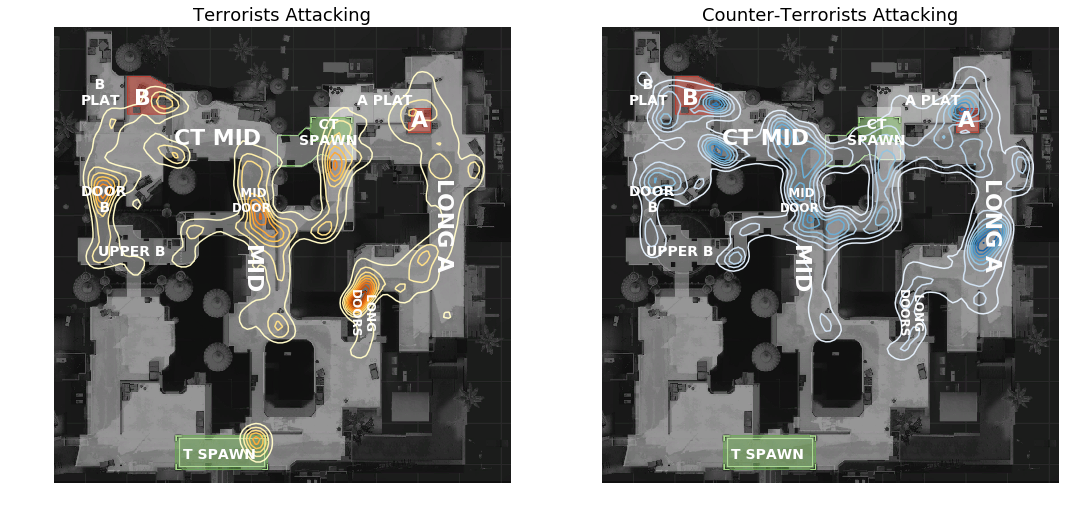

In [22]:
# Create 1X2 subplots
plot_df1 = dmg.loc[(dmg.att_side == 'Terrorist')]
plot_df2 = dmg.loc[(dmg.att_side == 'CounterTerrorist')]
heatmap(dust2,plot_df1['att_pos_x'],plot_df1['att_pos_y'],plot_df2['att_pos_x'],plot_df2['att_pos_y'],
        'Terrorists Attacking','Counter-Terrorists Attacking')

***Summary of attacking position heatmap:***

These two graphs are attacking position heatmaps. For a position on map, the denser the surrounding lines are, the more frequent attacks happen.  
The heatmaps represent the frequency of attacks from terrorists and counter-terrorists. We can see the primary battlefield is the place between Long A and Long Doors. It is worth noticing that terrorists have 5 concentrated attacking positions. Apart from Long Doors, terrorists also have preference on Mid Doors, Door B, T Spawn and CT Spawn. Unlike terrorists, counter-terrorists tend to attack from scattered positions.  

**2. Attacking position heatmap during pistol round**

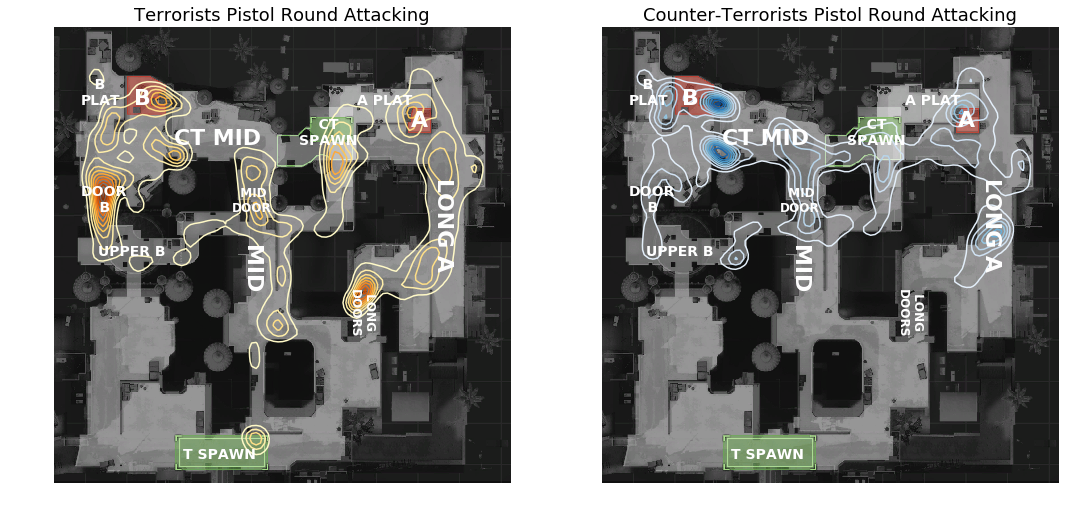

In [23]:
# Create 1X2 subplots
plot_df1 = dmg.loc[(dmg.att_side == 'Terrorist') & (dmg.round_type == 'PISTOL_ROUND')]
plot_df2 = dmg.loc[(dmg.att_side == 'CounterTerrorist') & (dmg.round_type == 'PISTOL_ROUND')]
heatmap(dust2,plot_df1['att_pos_x'],plot_df1['att_pos_y'],plot_df2['att_pos_x'],plot_df2['att_pos_y'],
        'Terrorists Pistol Round Attacking','Counter-Terrorists Pistol Round Attacking')

***Summary of attacking position heatmap during pistol round:***

These two graphs are attacking position heatmaps during pistol round. For a position on map, the denser the surrounding lines are, the more frequent attacks happen.  
Compared to overall attacking position heatmaps of all types of round, the distribution of attacking positions for terrorist side is more scattered while the distribution of counter-terrorist attacking position is more concentrative. Counter-terrorists have heavy preference on B side and the bottom left of CT Mid. Heavily attacking A side might be a wise choice for terrorists.

**3. Sniper attacking position heatmap**

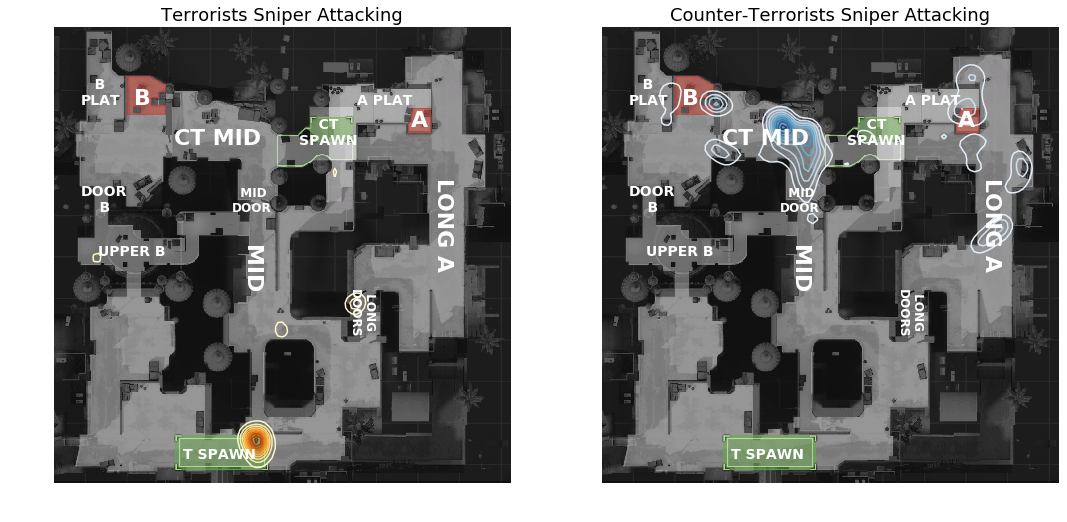

In [24]:
# Create 1X2 subplots
plot_df1 = dmg.loc[(dmg.att_side == 'Terrorist') & (dmg.wp_type == 'Sniper')]
plot_df2 = dmg.loc[(dmg.att_side == 'CounterTerrorist') & (dmg.wp_type == 'Sniper')]
heatmap(dust2,plot_df1['att_pos_x'],plot_df1['att_pos_y'],plot_df2['att_pos_x'],plot_df2['att_pos_y'],
        'Terrorists Sniper Attacking','Counter-Terrorists Sniper Attacking')

***Summary of sniper attacking position heatmap:***

These two graphs are sniper attacking position heatmaps. For a position on map, the denser the surrounding lines are, the more frequent attacks happen.  
From the left heatmap, we can see that terrorist sniper usually aims at Mid from the right of T Spawn. And counter-terrorist sniper usually locates at the right of CT MID. When a player attempts to accross Mid, it would better throw a smoke or covered by teammates.

**4. Grenade landing position heatmap**

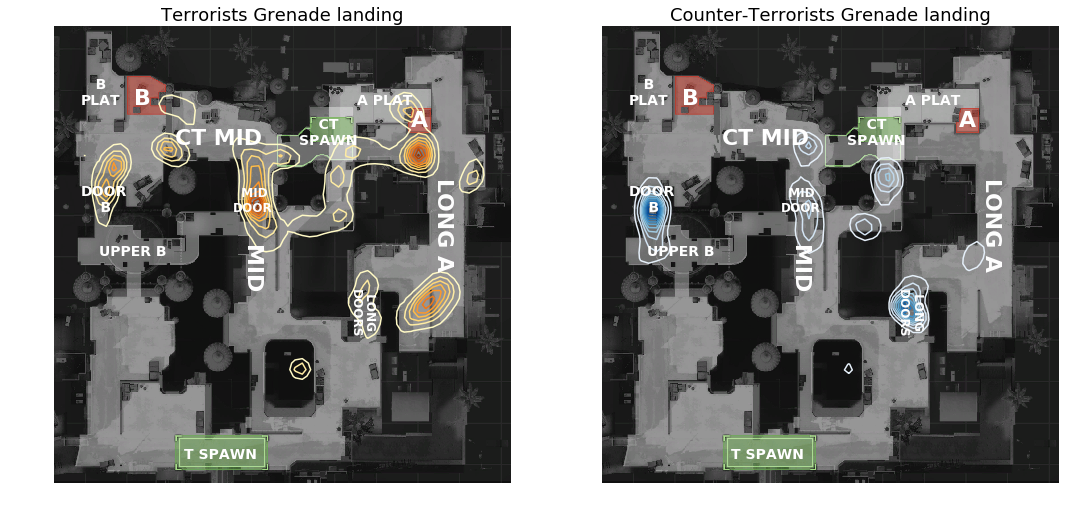

In [25]:
# Create 1X2 subplots
plot_df1 = grenade.loc[(grenade.att_side == 'Terrorist')]
plot_df2 = grenade.loc[(grenade.att_side == 'CounterTerrorist')]
heatmap(dust2,plot_df1['nade_land_x'],plot_df1['nade_land_y'],plot_df2['nade_land_x'],plot_df2['nade_land_y'],
        'Terrorists Grenade landing','Counter-Terrorists Grenade landing')

***Summary of grenade landing position heatmap:***

These two graphs are grenade landing position heatmaps. For a position on map, the denser the surrounding lines are, the more frequent grenades land.  
The heatmaps represent the frequency of grenade landing thrown by terrorists and counter-terrorists. It is obvious that grenade landing positions are concentrative. For terrorists, they tend to throw grenades at Mid Doors and A side. For counter-terrorists, they tend to throw grenades at Door B and Long Doors.

**5. Attacking position heatmap under counter-terrorists eco-advantage round**

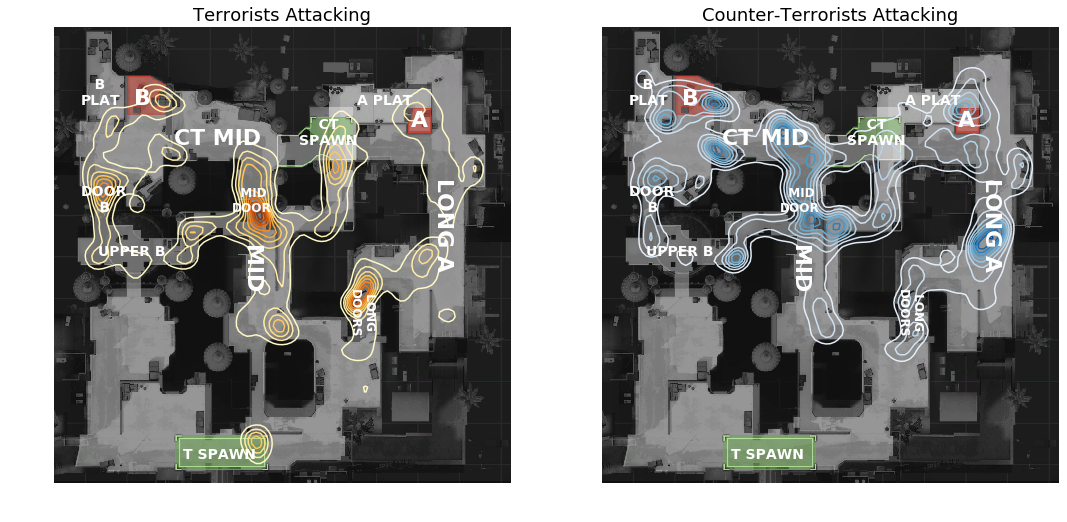

In [26]:
# Create 1X2 subplots
plot_df1 = dmg.loc[(dmg.att_side == 'Terrorist') & ((dmg.ct_eq_val-dmg.t_eq_val)>10000)]
plot_df2 = dmg.loc[(dmg.att_side == 'CounterTerrorist') & ((dmg.ct_eq_val-dmg.t_eq_val)>10000)]
heatmap(dust2,plot_df1['att_pos_x'],plot_df1['att_pos_y'],plot_df2['att_pos_x'],plot_df2['att_pos_y'],
        'Terrorists Attacking','Counter-Terrorists Attacking')

**6. Attacking position heatmap under terrorists eco-advantage round**

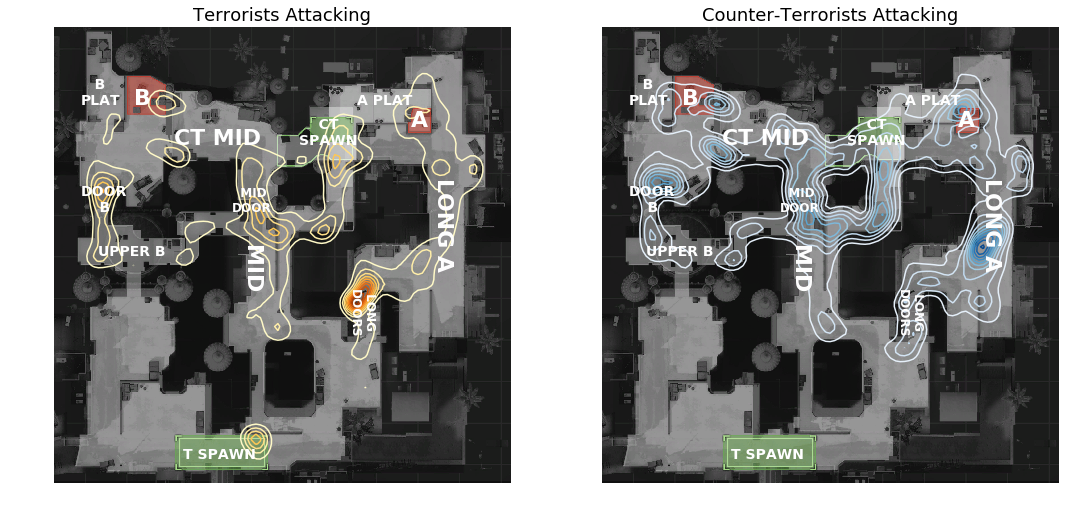

In [27]:
# Create 1X2 subplots
plot_df1 = dmg.loc[(dmg.att_side == 'Terrorist') & ((dmg.t_eq_val-dmg.ct_eq_val)>10000)]
plot_df2 = dmg.loc[(dmg.att_side == 'CounterTerrorist') & ((dmg.t_eq_val-dmg.ct_eq_val)>10000)]
heatmap(dust2,plot_df1['att_pos_x'],plot_df1['att_pos_y'],plot_df2['att_pos_x'],plot_df2['att_pos_y'],
        'Terrorists Attacking','Counter-Terrorists Attacking')

Upper two heatmaps show frequent attacking positions when counter-terrorist team's total equipment value is over 10000 larger than terrorist team's. Bottom two heatmaps show frequent attacking positions when terrorist team's total equipment value is over 10000 larger than counter-terrorist team's.
Comparing these heatmaps, we can notice that when counter-terrorist team has eco-advantage, terrorist team is more likely to attack Mid Door while terrorist team avoids attacking from Mid Door when it possesses eco-advantage. We also infer that when terrorist team is economically disadvantaged, it tends to attack B side. But when it is economically advantaged, it tends to attack A side. Counter-terrorist team could have an expectation of the side terrorists attack if they calculate the economy difference in advance.

## Conclusion-pending tasks

Since the data is somehow clean, we made more progress on geting insights of the data and on the analysis of data.
But we still have many pending tasks to do in the future.

**Preprocess:**

Except using the data directly from Kaggle, we are still working on getting additional data from CSGO website.

**Analysis:**

We shall provide buying strategies at the beginning of each round, considering round type, scores, and team-wealth. After that, we will track one specific player's match data and provide targeted strategy advice. Besides, bombing planting strategies is also a part we will work on.